In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('houses.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
null_counts = df.isnull().sum()
for col, count in null_counts.items():
    print(f'{col}: {count}')

Id: 0
MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 872
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
Po

# DATA CLEANING

In [28]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'Foundation', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir',
       'Electrical', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'TotalSF'],
      dtype='object')

In [10]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [11]:
cols_to_drop = ['Id','Alley', 'Street', 'Utilities', 'Neighborhood', 'LotConfig', 'Condition1', 'Condition2', 'RoofMatl',
                   'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'LowQualFinSF', 'FireplaceQu',
                   'HalfBath', 'BsmtHalfBath', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','TotalBsmtSF','1stFlrSF','2ndFlrSF']
df = df.drop(cols_to_drop, axis=1)

In [12]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

In [13]:
df['BsmtQual'] = df['BsmtQual'].fillna("No Basement")
df['BsmtCond'] = df['BsmtCond'].fillna("No Basement")
df['GarageType'] = df['GarageType'].fillna("No Garage")

In [14]:
# Assuming df is your DataFrame
df.dropna(subset=['Electrical'], inplace=True)

In [15]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LandSlope        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
Foundation       0
BsmtQual         0
BsmtCond         0
Heating          0
CentralAir       0
Electrical       0
GrLivArea        0
BsmtFullBath     0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
TotalSF          0
dtype: int64

# EDA

<Axes: xlabel='MSZoning', ylabel='count'>

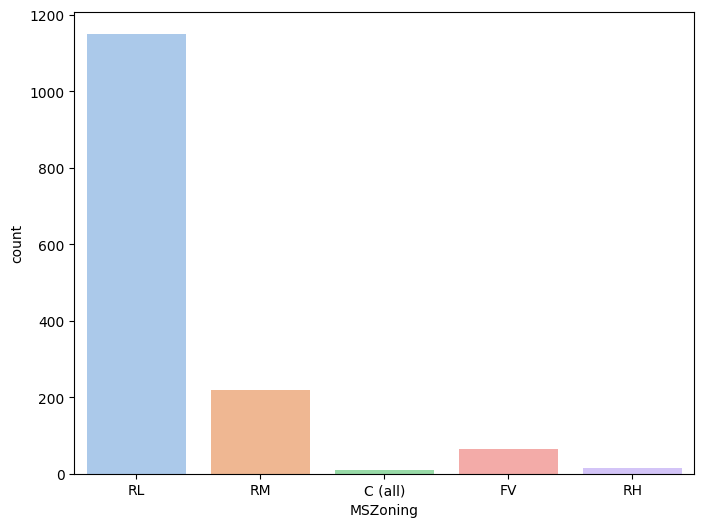

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x="MSZoning",data=df,palette='pastel')

<Axes: xlabel='MSSubClass', ylabel='count'>

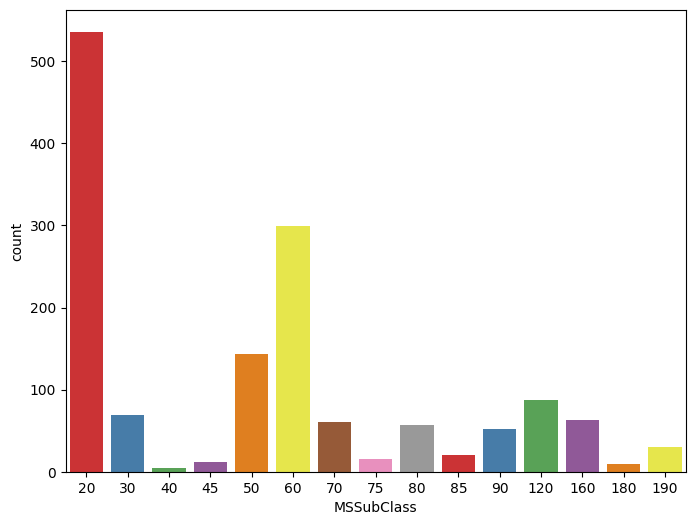

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x="MSSubClass",data=df,palette='Set1')

<Axes: xlabel='SaleCondition', ylabel='count'>

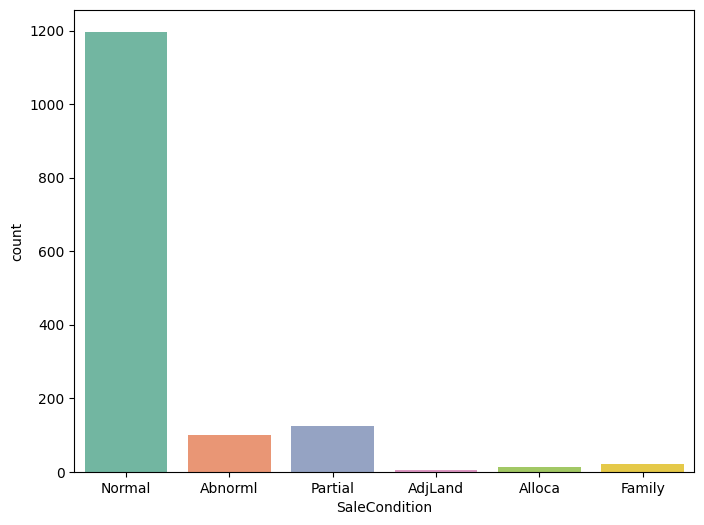

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="SaleCondition",data=df,palette='Set2')

([<matplotlib.patches.Wedge at 0x212600de000>,
 [Text(-0.44733821162770987, 1.0049320994065831, 'Reg'),
  Text(0.3345078770030446, -1.047904804943138, 'IR1'),
  Text(1.090524835217577, -0.14406798316654826, 'IR2'),
  Text(1.099745003953864, -0.02368388225177331, 'IR3')],
 [Text(-0.24400266088784173, 0.5481447814944997, '63.3%'),
  Text(0.18245884200166065, -0.5715844390598934, '33.2%'),
  Text(0.5948317283004965, -0.07858253627266268, '2.8%'),
  Text(0.5998609112475621, -0.012918481228239987, '0.7%')])

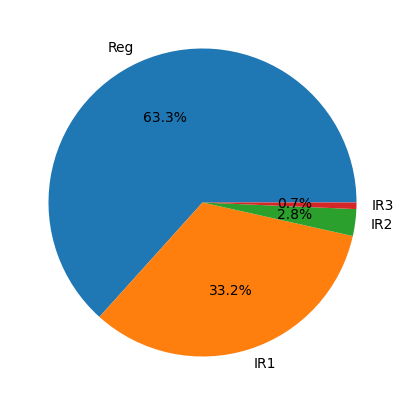

In [19]:
plt.figure(figsize=(5,5))
kind_counts = df['LotShape'].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x21260578680>,
 [Text(-1.0438698863658529, 0.3468943071578744, 'Lvl'),
  Text(0.9621518189207552, -0.5331640248061401, 'Bnk'),
  Text(1.06226253818276, -0.2856541614846882, 'HLS'),
  Text(1.0966967618513574, -0.08518340533664592, 'Low')],
 [Text(-0.5693835743813742, 0.18921507663156784, '89.8%'),
  Text(0.5248100830476846, -0.2908167408033491, '4.3%'),
  Text(0.579415929917869, -0.1558113608098299, '3.4%'),
  Text(0.598198233737104, -0.0464636756381705, '2.5%')])

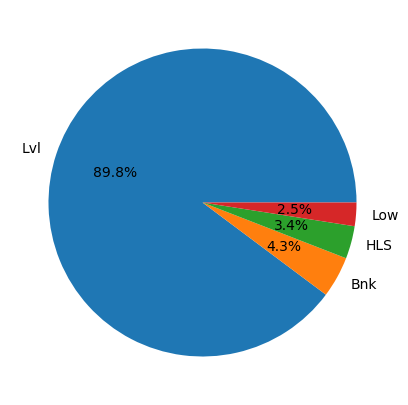

In [20]:
plt.figure(figsize=(5,5))
kind_counts = df['LandContour'].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%1.1f%%")

<Axes: xlabel='SalePrice', ylabel='Count'>

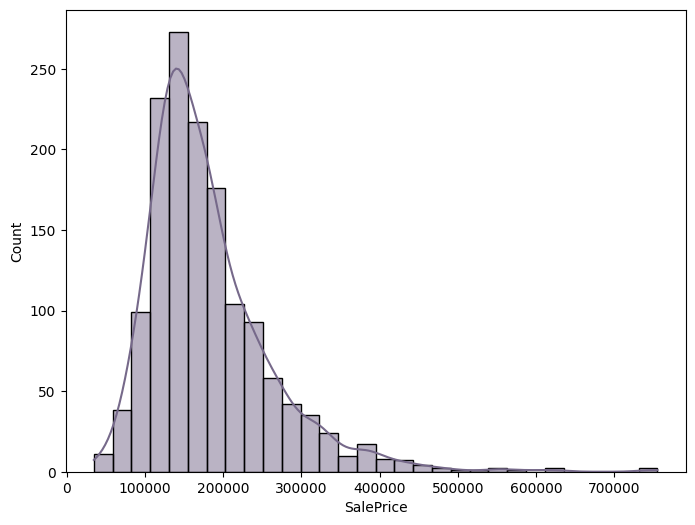

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'],bins=30,kde=True,color='#76698a')

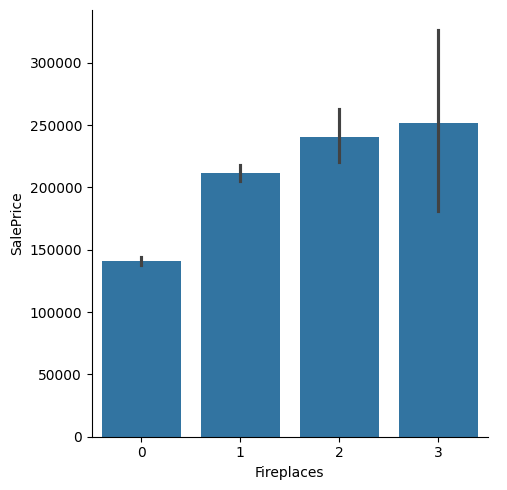

In [22]:
sns.catplot(x="Fireplaces", y="SalePrice", data=df, kind="bar")

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

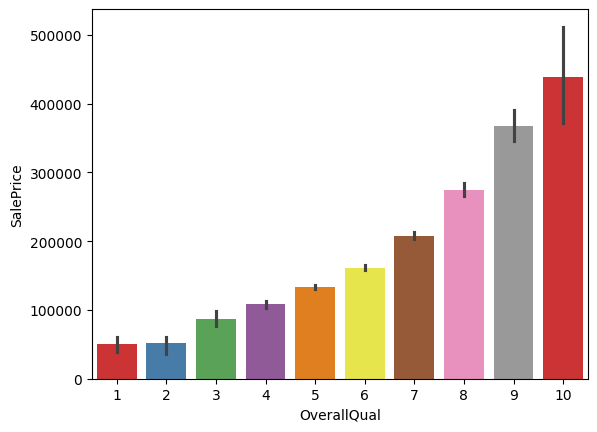

In [23]:
sns.barplot(x="OverallQual",y="SalePrice",data=df,palette="Set1")

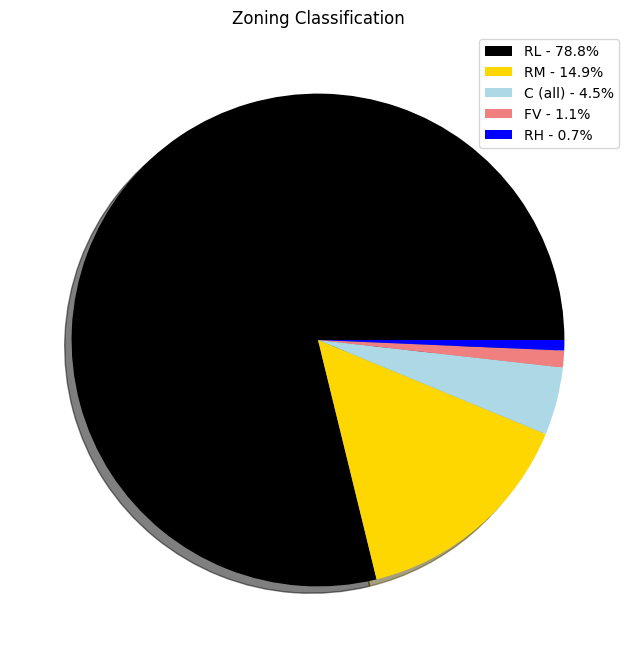

In [24]:
plt.figure(figsize=(10,8))
labels = df['MSZoning'].unique()
sizes = df['MSZoning'].value_counts().values
percent = 100 * sizes / sizes.sum()
labels = ['{} - {:.1f}%'.format(i, j) for i, j in zip(labels, percent)]
colors = ['black', 'gold', 'lightblue', 'lightcoral', 'blue']
patches, text = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc='best')
plt.title('Zoning Classification')
plt.show()

Text(0, 0.5, 'SalesPrice')

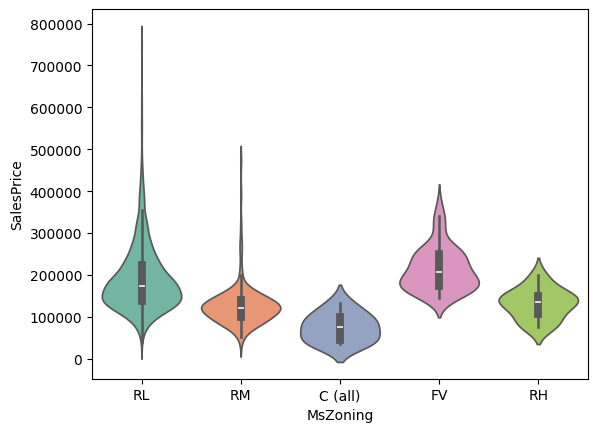

In [25]:
sns.violinplot(x='MSZoning',y='SalePrice',data=df,palette='Set2')
plt.xlabel('MsZoning')
plt.ylabel('SalesPrice')

Text(0, 0.5, 'Number of Sales')

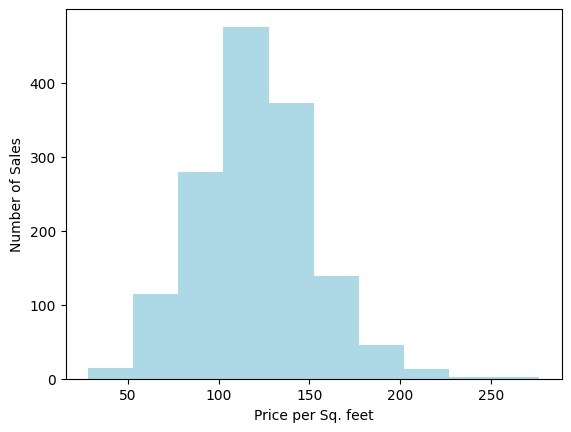

In [26]:
SalesPriceSF = df['SalePrice']/df['GrLivArea']
plt.hist(SalesPriceSF,color='lightblue')
plt.xlabel('Price per Sq. feet')
plt.ylabel('Number of Sales')

Text(0.5, 1.0, 'Sale Price vs Full Bathrooms')

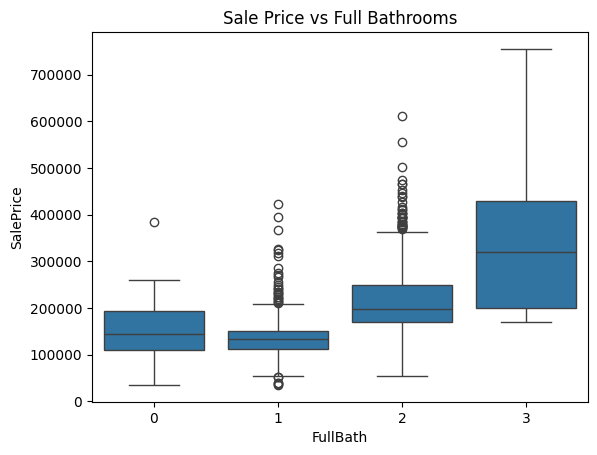

In [27]:
sns.boxplot(x='FullBath',y='SalePrice',data=df)
plt.title('Sale Price vs Full Bathrooms')

# Feature Engineering

In [30]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)

In [32]:
cat_cols = [col for col in df.columns.values if df[col].dtype == 'object']
data_cat = df[cat_cols]
data_num = df.drop(cat_cols,axis=1)

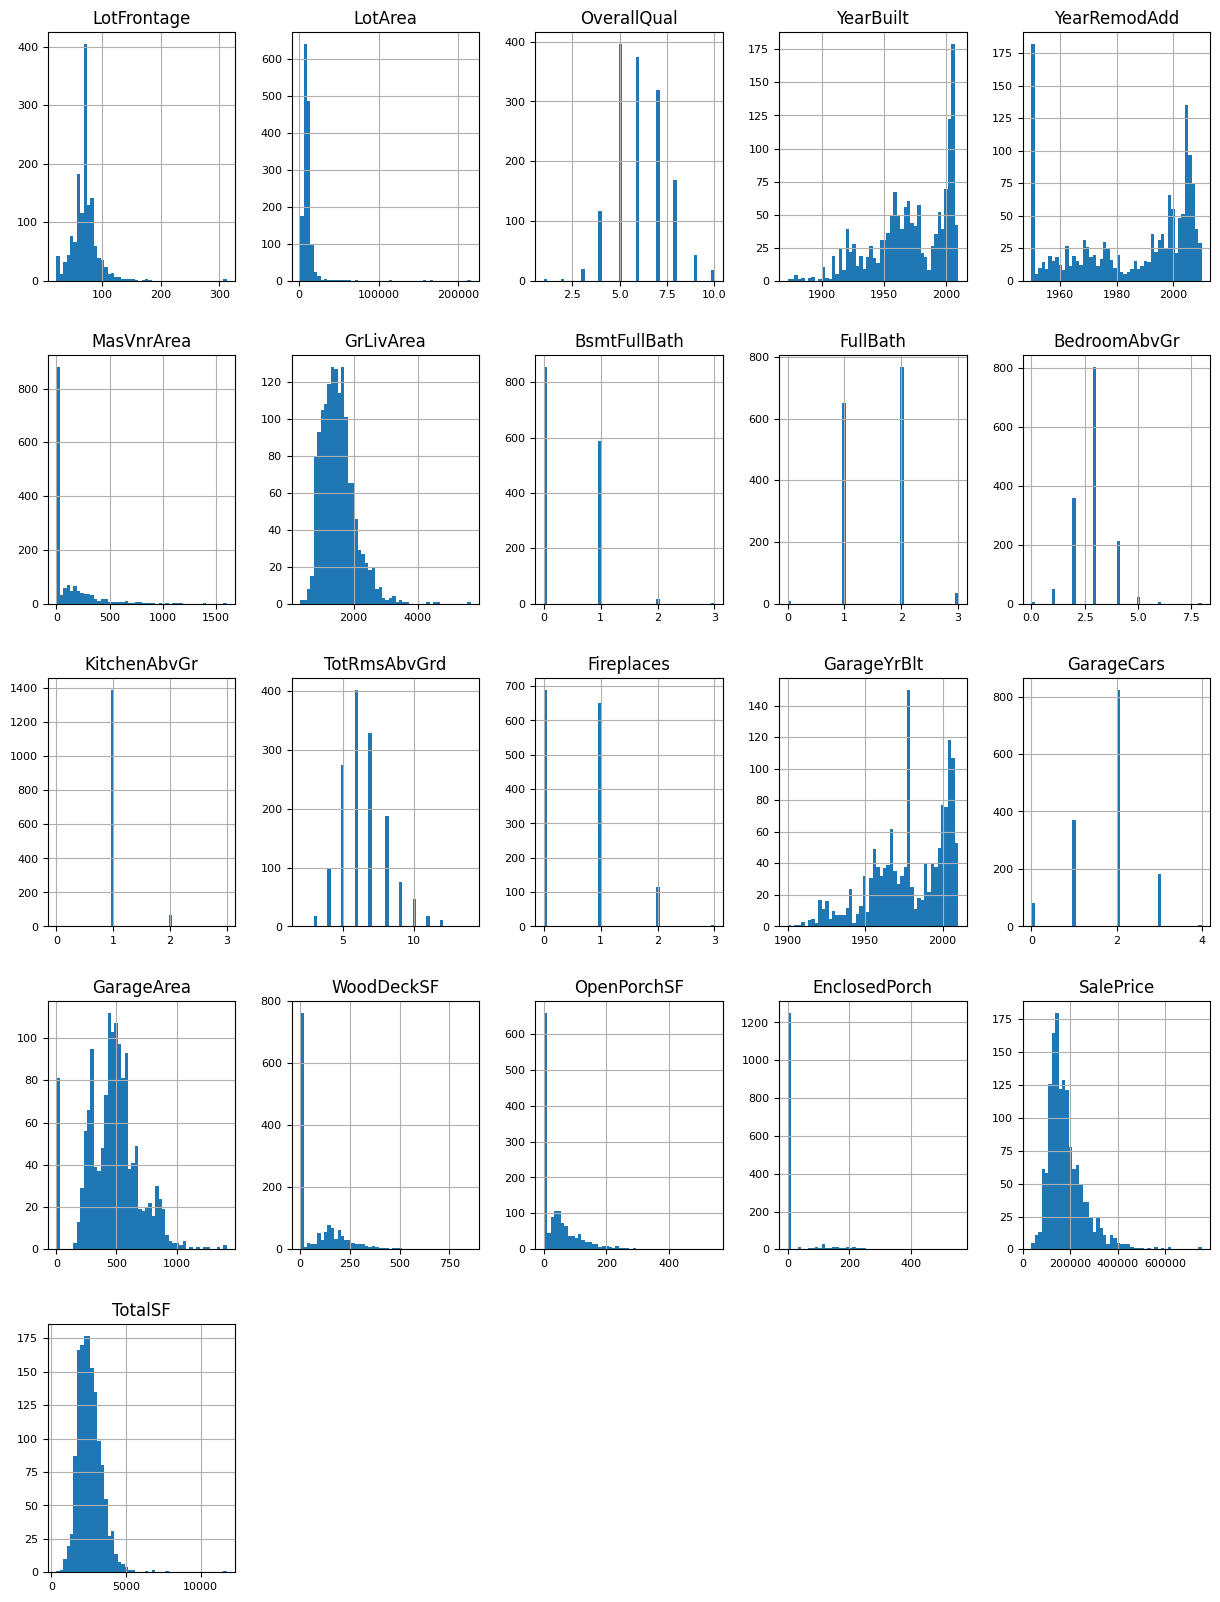

In [33]:
data_num.hist(figsize=(15,20),bins=50,xlabelsize=8,ylabelsize=8);

In [36]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > 0.75] 
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

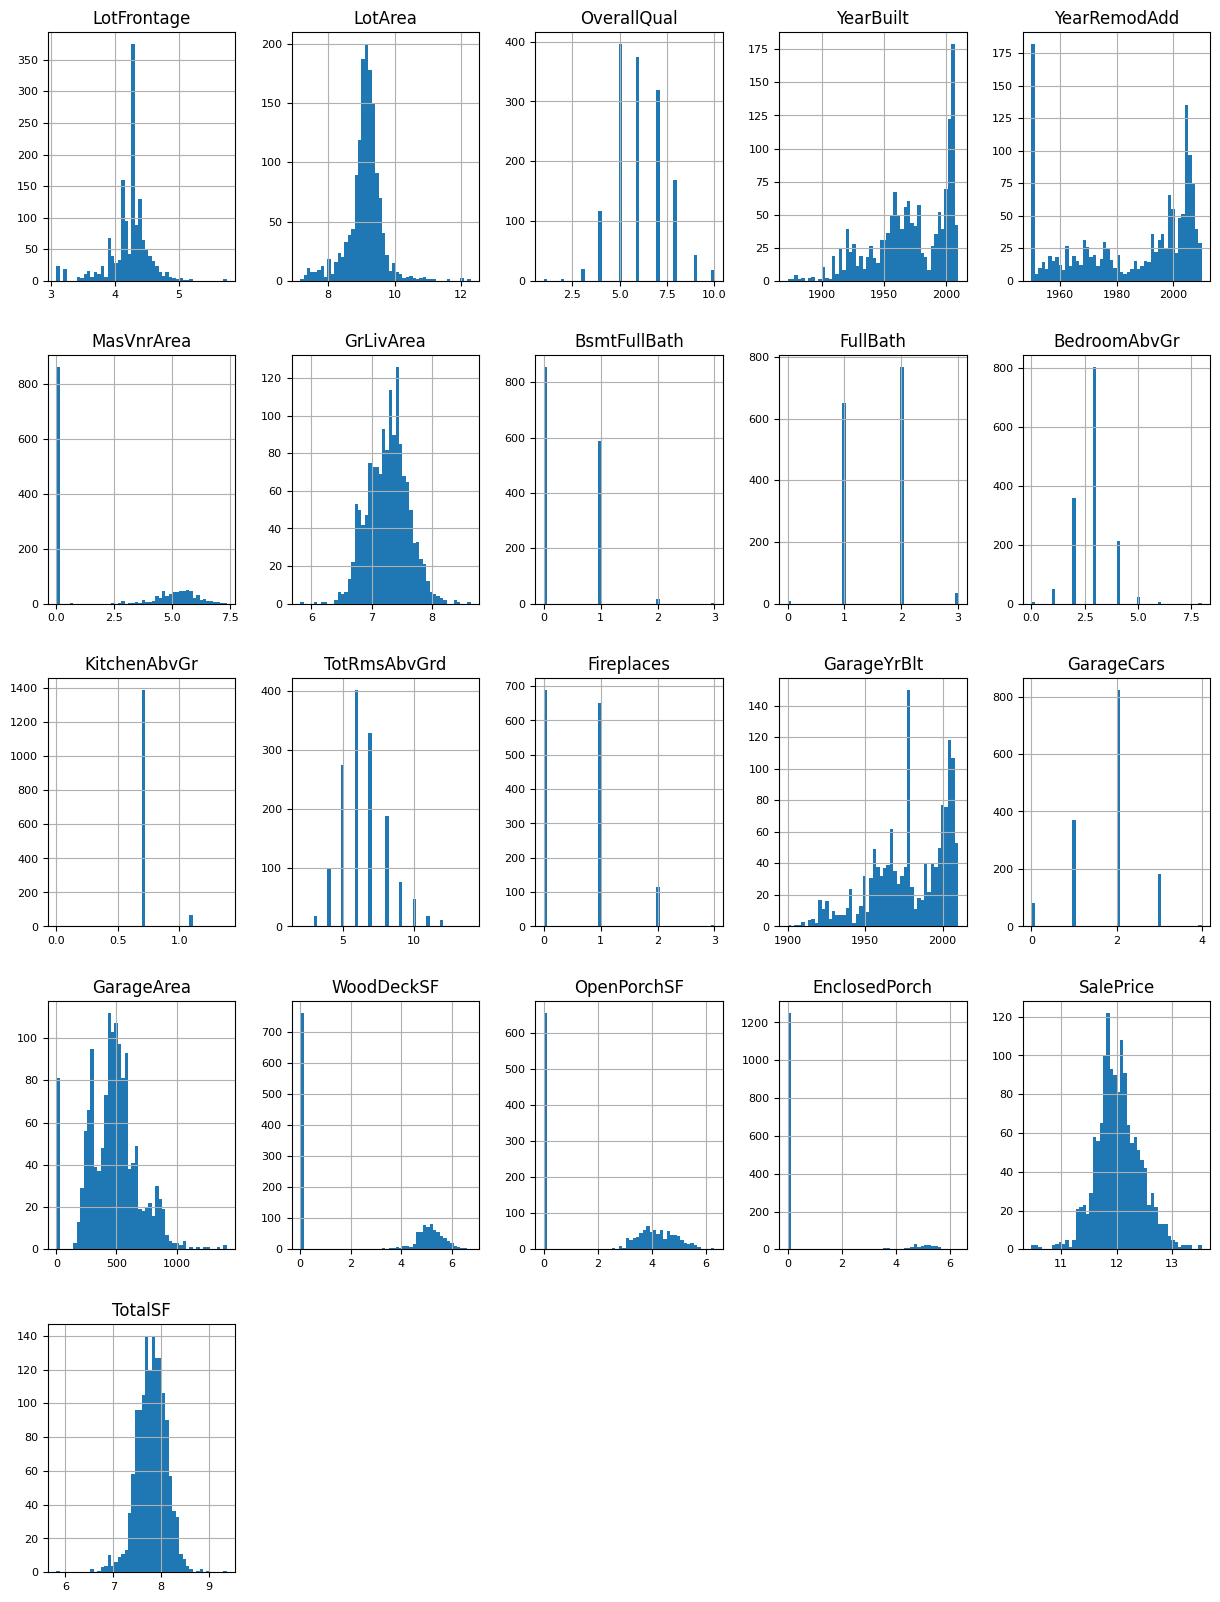

In [37]:
data_num.hist(figsize=(15,20),bins=50,xlabelsize=8,ylabelsize=8);

# mean normalization

In [38]:
data_num = (data_num - data_num.mean())/(data_num.max()-data_num.min())

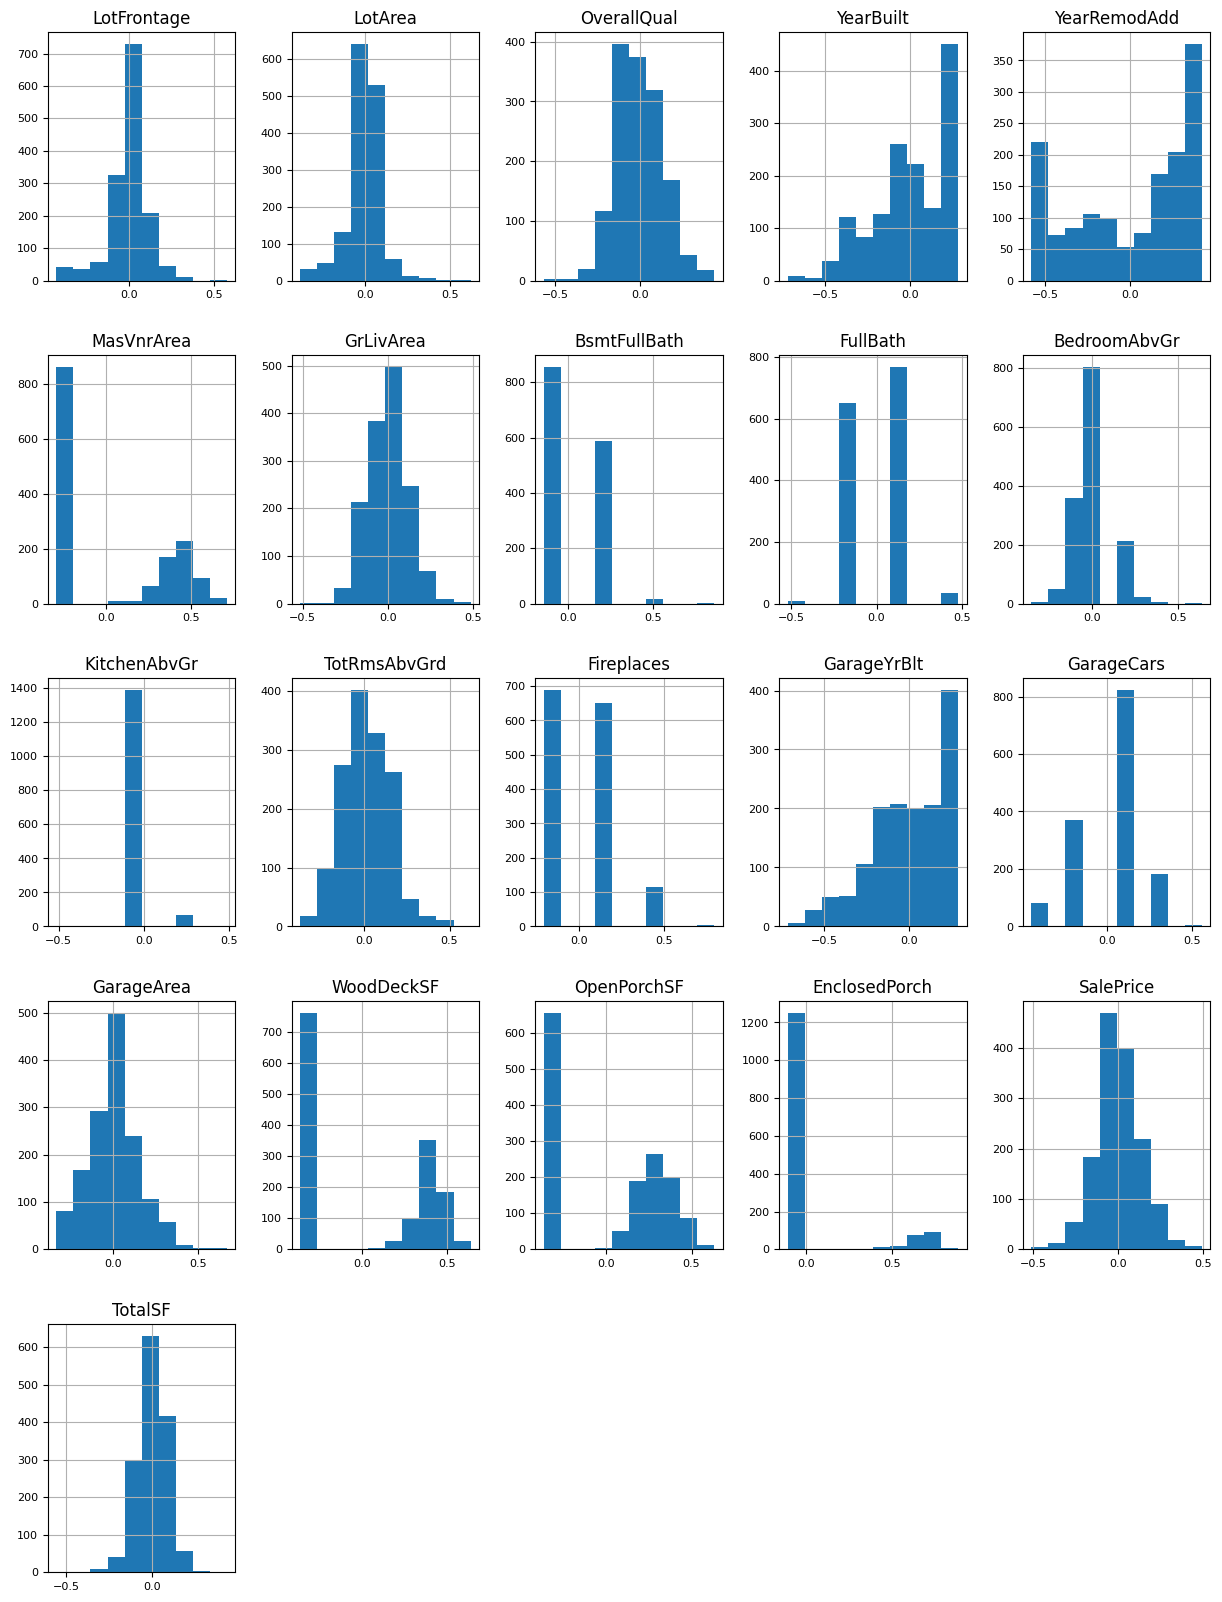

In [39]:
data_num.hist(figsize=(15,20),xlabelsize=8,ylabelsize=8);

In [43]:
# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [40]:
for i, col in enumerate(df.columns):
    print(f"Column '{col}' has index number {i}")

Column 'MSSubClass' has index number 0
Column 'MSZoning' has index number 1
Column 'LotFrontage' has index number 2
Column 'LotArea' has index number 3
Column 'LotShape' has index number 4
Column 'LandContour' has index number 5
Column 'LandSlope' has index number 6
Column 'BldgType' has index number 7
Column 'HouseStyle' has index number 8
Column 'OverallQual' has index number 9
Column 'OverallCond' has index number 10
Column 'YearBuilt' has index number 11
Column 'YearRemodAdd' has index number 12
Column 'RoofStyle' has index number 13
Column 'MasVnrArea' has index number 14
Column 'Foundation' has index number 15
Column 'BsmtQual' has index number 16
Column 'BsmtCond' has index number 17
Column 'Heating' has index number 18
Column 'CentralAir' has index number 19
Column 'Electrical' has index number 20
Column 'GrLivArea' has index number 21
Column 'BsmtFullBath' has index number 22
Column 'FullBath' has index number 23
Column 'BedroomAbvGr' has index number 24
Column 'KitchenAbvGr' 

In [41]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [0,1,4,5,6,7,8,10,13,15,16,17,18,19,20,26,28,30,37,38,39,40])],
    remainder='passthrough')

lr = LinearRegression()

In [51]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pre', transformer),
    ('algo', lr)
])

In [52]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 4, 5, 6, 7, 8, 10, 13,
                                                   15, 16, 17, 18, 19, 20, 26,
                                                   28, 30, 37, 38, 39, 40])])),
                ('algo', LinearRegression())])

In [53]:
pipe.score(X_test,Y_test)

0.8561111899021203

In [55]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 64900.35545129, 138982.45793551, 128438.66924769, 173792.51444682,
        53272.11508652,  89660.07359123, 236329.54183769, 279320.37298044,
       304662.64738001, 129732.3259841 , 163188.49363427, 188415.03526501,
       197065.35913867, 211815.15838524, 219515.70989676, 171500.16668502,
       207234.46064564, 112170.27671566, 114864.4315105 , 221153.25954328,
       176415.78502579, 202096.27573216, 106863.00353872, 253687.60009479,
       203004.02928709, 147487.23207113, 205938.9671817 ,  88857.80212163,
       173611.64075823, 141427.3496286 , 122573.00467959, 253615.68949227,
       197048.26966414, 101490.14358579, 114993.28250296, 187970.02431651,
       123210.90489041, 218350.30396155, 151984.61782164,  81573.44587352,
       136477.80630682, 244311.77256804, -16989.61763503, 350542.49975713,
       328072.72704082, 161564.0610372 ,  57404.86585393, 126280.25281798,
       372654.45253218, 193539.58480039, 216142.06586103, 103735.39350658,
        97969.22756983, 1

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)

print("R-squared (R2) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2) score: 0.8561111899021203
Mean Squared Error (MSE): 777228360.9947195


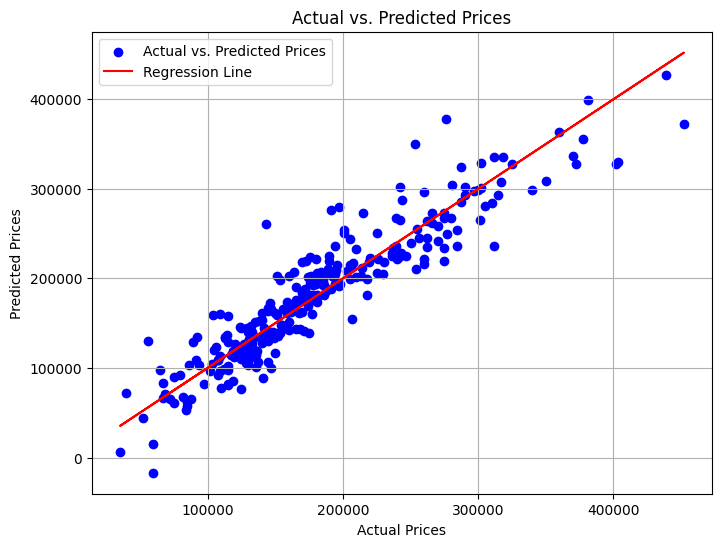

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs. Predicted Prices')

plt.plot(Y_test, Y_test, color='red', label='Regression Line')  # Plotting a line with slope 1 and intercept 0

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)

In [64]:
import pickle

filename = 'house_model.pkl'
pickle.dump(pipe,open(filename,'wb'))

In [65]:
loaded_model = pickle.load(open('house_model.pkl','rb'))